# 2. First Examples 🔬

## 2.1 Import all necessary libraries  📚

In [1]:
#from the cosmo_visualizations code in our src folder
from opencosmorspy.cosmo_visualizations import plot_sigma_profiles
from opencosmorspy.cosmo_visualizations import plot_3D_segment_location
from opencosmorspy.cosmo_visualizations import plot_extended_sigma_profile_plotly
from opencosmorspy.cosmo_visualizations import plot_sigma_profiles_plotly

#from the cosmors code in our src folder
from opencosmorspy.cosmors import COSMORS 

#from the input_parsers code in our src folder
from opencosmorspy.input_parsers import SigmaProfileParser

#from the parameterization code in our src folder
from opencosmorspy.parameterization import Parameterization
from opencosmorspy.parameterization import openCOSMORS24a

#other libraries:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly
import os
from matplotlib import pyplot as plt
import scipy.constants as spcon
from tabulate import tabulate
import kaleido
from scipy.optimize import fsolve
from rdkit import Chem
periodic_table = Chem.GetPeriodicTable()
from scipy import constants

## 2.2 Define the paths to our .orcacosmo files and set the output directory 📒

We are going to be using the <span style="color:#1E90FF;">water.inp</span> file as well as <span style="color:#FF8C00;">butane.inp</span> file. Run the section where we created the input files but now change the file name to **two_molecules.inp**. <br>
Aftwards you should see two more folders: pentane and butane.

**Remember** that for every line that you have the following symbols: ⚠️⚠️⚠️ you need to specify the correct address in your computer

In [2]:
#Let's now create the folder where we are going to save all of our results
# ⚠️⚠️⚠️
output_dir = r"C:\Users\prisc\Desktop\Results_openCOSMO"
os.chdir(output_dir)

In [3]:
#then create the folder where our files are gonna be, for this line to work we need to make sure that the folder does not exist!

#os.makedirs(output_dir)

Add the input files of our molecules

In [4]:
#input files⚠️⚠️⚠️
water_input = r"C:\Users\prisc\Desktop\orcacosmo_files\water\COSMO_TZVPD\water_c000.orcacosmo"
butane_input = r"C:\Users\prisc\Desktop\orcacosmo_files\butane\COSMO_TZVPD\butane_c000.orcacosmo"
pentane_input = r"C:\Users\prisc\Desktop\orcacosmo_files\pentane\COSMO_TZVPD\pentane_c000.orcacosmo"

## 2.3 Choose a parameterization and call the model ⚙️

You can choose between **default_turbomole** or **default_orca**. This refers to the computational chemistry software packages Turbomole and ORCA.

- Turbomole: it is designed for parallel computing, (type of computation where many calculations or processes are carried out simultaneously) making it suitable for high performance computing systems.

- ORCA: it achieves a good balance between accuracy and computational cost, with efficient algorithms for both small and large systems.

In [5]:
# Initialize parameterization for ORCA
par = Parameterization('default_orca')

#Add the model - this variable is what we are going to use to call our functions later, so pick one that is simple and easy to remember
model = COSMORS(par)

## 2.4 Let's start with the first calculations using openCOSMO 🧪

In [6]:
#Use the function calculate_contact_statistics_molecule_properties from the cosmo-rs code
model.par.calculate_contact_statistics_molecule_properties = True

# Optional👀 but we can save as txt file the parameterization details to see
txt_par = os.path.join(output_dir, 'par.txt')
with open(txt_par, 'w') as txt_file:
    for key, value in vars(model.par).items():
        txt_file.write(f"{key} : {value}\n")

#print(model.par)

In [7]:
# First, clear all previous jobs and molecules (since this is our first time using the model, this step is not necessary)
model.clear_jobs()
model.clear_molecules()

#Add the new molecules to the model
model.add_molecule([butane_input]) #molecule number 1
model.add_molecule([water_input]) #molecule number 2


#Add the mole fractions
#This is the mole fraction array for the mixture we are analyzing, the first number corresponds to butane and the second one to water
mole_fractions  = np.array([0.0, 1]) 

#set the temperature in K
T = 298.15

<div style="line-height: 1.5;">

Now we can perform the job, the formula for it is: <br>

**model.add_job(mole_fractions, temperature, refst)**
<br>

The **refst** is the reference state. This property is used to calculate the chemical potential, which describes the difference between the mixture and the reference state. Remember that the formula for the potential energy is: 

$E=mgh$. 

We can think of the $h$ as our starting point, i.e. the refst. 

<img src="refst.png" alt="reference_state" width="550"/>

1. **<span style="color:#FF6347;">'pure component'</span>**: use it when we want to understand the behavior of each component relative to its *pure state*. Useful for calculating properties like infinite dilution activity coefficients or comparing mixture behavior to pure substances

2. **<span style="color:#1E90FF;">'reference_mixture'</span>**: use it when we have a specific mixture to study the deviations from it

3. **<span style="color:#32CD32;">'COSMO'</span>**: use it when we want to calculate properties "without" reference state. This state is used to calculate solvation energies
<div>



In [8]:
#add the job as 'pure_component'
refst="pure_component"
model.add_job(mole_fractions, T, refst)

# Perform calculations
results_PC = model.calculate()

print('Total logarithmic activity coefficient using pure_component: ', results_PC['tot']['lng'])
print('Residual logarithmic activity coefficient using pure_component: ', results_PC['enth']['lng'])
print('Combinatorial logarithmic activity coefficient using pure_component:', results_PC['comb']['lng'])


#Optional👀 Save the results as a txt file
cosmors_results_output_path = os.path.join(output_dir, 'cosmors_results_water_butane.txt')

with open(cosmors_results_output_path, 'w') as txt_file:
    txt_file.write("COSMORS Results\n")
    txt_file.write("================\n")
    
    # Mole fractions
    txt_file.write("Mole Fractions (x):\n")
    txt_file.write(f"{results_PC['x']}\n\n")
    
    # Temperature
    txt_file.write("Temperature (T):\n")
    txt_file.write(f"{results_PC['T']}\n\n")
    
    # Total Results
    txt_file.write("Total Results (tot):\n")
    for key, value in results_PC['tot'].items():
        txt_file.write(f"{key}: {value}\n")
    txt_file.write("\n")
    
    # Enthalpic Results
    txt_file.write("Enthalpic Results (enth):\n")
    for key, value in results_PC['enth'].items():
        txt_file.write(f"{key}: {value}\n")
    txt_file.write("\n")
    
    # Combinatorial Results
    txt_file.write("Combinatorial Results (comb):\n")
    for key, value in results_PC['comb'].items():
        txt_file.write(f"{key}: {value}\n")


Total logarithmic activity coefficient using pure_component:  [[9.51404423 0.        ]]
Residual logarithmic activity coefficient using pure_component:  [[10.29435427  0.        ]]
Combinatorial logarithmic activity coefficient using pure_component: [[-0.78031005  0.        ]]


<div style="line-height: 1.5;">

Since we used **<span style="color:#FF6347;">'pure component'</span>** as a reference state and the mol fractions are [0,1] means that the Total logarithmic activity coefficient is actually the **<span style="color:#FF69B4;">Infinite dilution activity coefficient</span>** of butane in water at the given temperature.
<div>

Let's try with **<span style="color:#1E90FF;">'reference_mixture'</span>** and **<span style="color:#32CD32;">'COSMO'</span>** as reference state:

In this second example we are using  **<span style="color:#1E90FF;">'reference_mixture'</span>** as refst. For the first component we are calculating $\gamma^\infty.$ for the refst is at **0**, i.e. infinitely diluted. For the second component we are calculating $\gamma$

In [9]:
model.clear_jobs()
model.clear_molecules()

# add the job as 'reference_mixture'
refst="reference_mixture"

#add molecules:
model.add_molecule([butane_input]) #molecule number 1
model.add_molecule([water_input]) #molecule number 2


mole_fractions = np.array([0.4, 0.6]) 

#This is the mole fraction array for the reference mixture AGAINST which we want to compare the job mixture. 
#if we put the same fractions for the x_refst and the mole_fractions, the result will be zero 
# - as we are comparing with the same reference state)
x_refst=np.array([0, 1]) 

model.add_job(mole_fractions, T, refst, x_refst)


# Perform calculations
results_RM = model.calculate()

#Print the results
print('Total logarithmic activity coefficient using reference_mixture: ', results_RM['tot']['lng'])
print('Residual logarithmic activity coefficient using reference_mixture: ', results_RM['enth']['lng'])
print('Combinatorial logarithmic activity coefficient using reference_mixture:', results_RM['comb']['lng'])


Total logarithmic activity coefficient using reference_mixture:  [[-7.59753365  1.26694064]]
Residual logarithmic activity coefficient using reference_mixture:  [[-8.23177142  1.39386759]]
Combinatorial logarithmic activity coefficient using reference_mixture: [[ 0.63423777 -0.12692695]]


In [10]:
model.clear_jobs()
model.clear_molecules()

#add the job as 'COSMO'
refst='cosmo'

#add molecules, this time with pentane
model.add_molecule([pentane_input]) #molecule number 1
model.add_molecule([water_input]) #molecule number 2

model.add_job(mole_fractions, T, refst)
# Perform calculations
results_CO = model.calculate()
print('Total logarithmic activity coefficient using cosmo: ', results_CO['tot']['lng'])
print('Residual logarithmic activity coefficient using cosmo: ', results_CO['enth']['lng'])
print('Combinatorial logarithmic activity coefficient using cosmo:', results_CO['comb']['lng'])

Total logarithmic activity coefficient using cosmo:  [[ 2.45646935 -0.93100187]]
Residual logarithmic activity coefficient using cosmo:  [[ 2.63485277 -0.76204584]]
Combinatorial logarithmic activity coefficient using cosmo: [[-0.17838341 -0.16895603]]


## Multiple calculations:

<div style="line-height: 1.5;">

If we have more molecules that we want to calculate the $\gamma^\infty.$, we include them all in the array. What the code does is a single calculation for the whole mixture, and then calculates the $\gamma^\infty$ for each single component in our array. For 4 components plus our solvent it would look something like the image below, performing 6 calculations in total

![multiple](mulitple_calc.png)

<br><br><br>

It is computationally more effective than to do a *for loop* because we would have to perform additional calculations:

<br><br>

![forloop](forloop.png)




In [11]:
#example with the molecules of butane, cyclopentane, benzene and toluene in water, lets add the remaining ones:
cp_input = r"C:\Users\prisc\Desktop\orcacosmo_files\cyclopentane\COSMO_TZVPD\cyclopentane_c000.orcacosmo"
bz_input =  r"C:\Users\prisc\Desktop\orcacosmo_files\benzene\COSMO_TZVPD\benzene_c000.orcacosmo"
tol_input = r"C:\Users\prisc\Desktop\orcacosmo_files\toluene\COSMO_TZVPD\toluene_c000.orcacosmo"


model.clear_molecules()
model.clear_jobs()


#Add the new molecules to the model
model.add_molecule([butane_input]) #molecule number 1
model.add_molecule([cp_input]) #molecule number 2
model.add_molecule([bz_input]) #3
model.add_molecule([tol_input]) #4
model.add_molecule([water_input]) #5


#Add the mole fractions
mole_fractions  = np.array([0, 0, 0, 0, 1]) 

#set the temperature in K
T = 298.15

#refst and call model
refst='pure_component'
model.add_job(mole_fractions, T, refst)

results_multiple = model.calculate()

print('Total logarithmic activity coefficient using cosmo: ', results_multiple['tot']['lng'])

Total logarithmic activity coefficient using cosmo:  [[9.51404423 9.72489802 7.87271231 9.41188882 0.        ]]


<div style="line-height: 1.5;">

We have in total **5** $\gamma^\infty.$ 

- If we were to perform only butane and water: <br>
    - Total logarithmic activity coefficient using cosmo:  **[[9.51404423 , 0.]]**

- With butane, cyclopentane, benzene, toluene and water: <br>
    - Total logarithmic activity coefficient using cosmo:  **[[9.51404423 , 9.72489802 , 7.87271231 , 9.41188882 , 0. ]]**
<br>
<div>

# 2.5 Plotting 📈

The **cosmo_visualizations.py** in the src folder contains various functions that helps us vizualize the "σ-profile" of our molecule.

For the **<span style="color:#32CD32;">plot_sigma_profiles</span>** functions, we can use multiple files as input to plot them in the same graph and compare them:

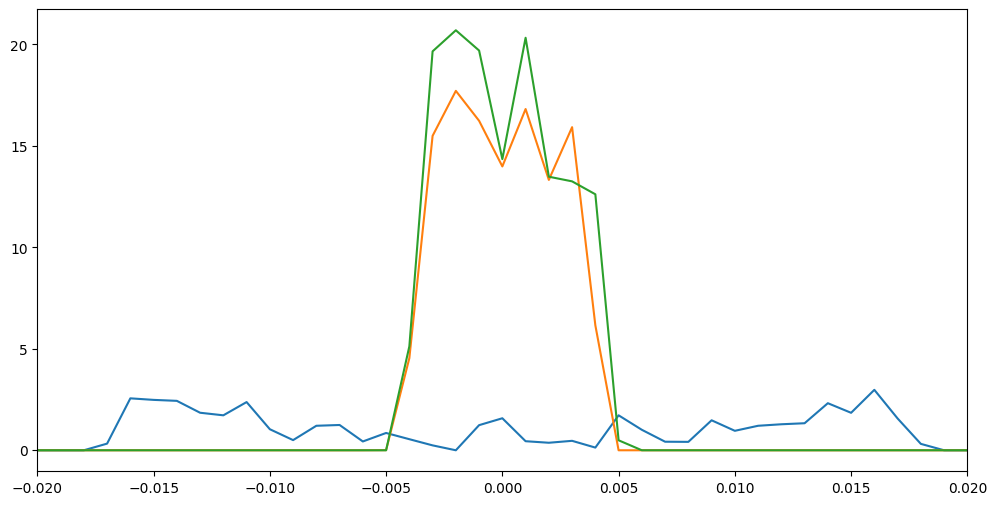

In [12]:
#for our water molecule:
plot_sigma_profiles(
    filepath_lst=[water_input, butane_input, pentane_input],
    plot_name='my_sigma_plot',
    xlim=(-0.02, 0.02),
    dir_plot=output_dir,
    aggregate_plots=False  # Use the correct parameter name
)

In [13]:
plot_3D_segment_location(water_input)

## 2.5.1 Sigma profiles using plotly

For the following functions a **pop-up window** will appear with the graph and several *"extsp_molecule name"* files will be saved in our output folder we specified:

In [14]:
#this function will open up a 
plot_sigma_profiles_plotly(filepath_lst=[water_input]) #you can add more than one orcacosmo file in here with ,

In [15]:
plot_extended_sigma_profile_plotly(butane_input)

# 2.6 Further examples:

In [16]:
# We need to change to the openCOSMO-RS directory, ⚠️⚠️⚠️
new_directory = r'c:\Users\prisc\Desktop\openCOSMO-RS_py\examples'

# Change the current working directory
os.chdir(new_directory)

# Verify the change
print("Current Directory:", os.getcwd())

Current Directory: c:\Users\prisc\Desktop\openCOSMO-RS_py\examples


Using the new openCOSMO-RS 24a parameter set:

Total logarithmic activity coefficient:  [[2.2587486  0.        ]
 [2.24015471 0.        ]
 [0.16659988 0.44666041]] 

Residual logarithmic activity coefficient:  [[2.57913503 0.        ]
 [2.56054114 0.        ]
 [0.21602009 0.52331749]]
Combinatorial logarithmic activity coefficient: [[-0.32038643  0.        ]
 [-0.32038643  0.        ]
 [-0.04942021 -0.07665708]]


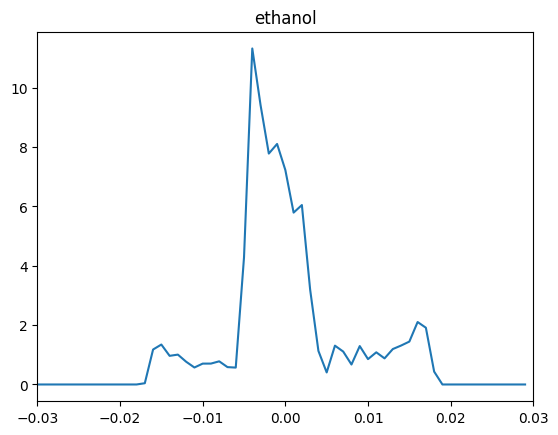

Descriptors for ethanol
energy_dielectric -25.10678663745665
dipole_moment [-0.047311 -2.168231 -0.003471]
area 89.54018440890813
volume 68.36642744911612
sigma_moments [ 8.95401844e+01 -3.52331248e-04  4.47498246e+01  1.76274455e+01
  8.17963923e+01  4.88916504e+01  1.85772219e+02]
sigma_hydrogen_bond_donor_moments [2.30820891 1.18997386 0.38293059]
sigma_hydrogen_bond_acceptor_moments [4.83881932 2.87393992 1.31282655]
-----------------------------------------------


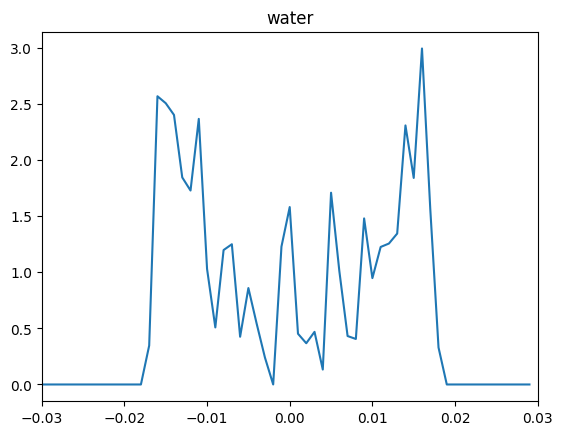

Descriptors for water
energy_dielectric -32.88772262001589
dipole_moment [ 4.500000e-05 -2.302853e+00  0.000000e+00]
area 42.89774598167642
volume 25.365505135002042
sigma_moments [4.28977460e+01 7.93007980e-05 6.06141519e+01 3.87999923e+00
 1.20676657e+02 1.77642596e+01 2.67165157e+02]
sigma_hydrogen_bond_donor_moments [5.13359864 2.61757537 0.86837383]
sigma_hydrogen_bond_acceptor_moments [5.77724896 3.3268231  1.38458782]
-----------------------------------------------


In [17]:
%matplotlib inline
crs = COSMORS(par=openCOSMORS24a())

crs.add_molecule(['./../tests/COSMO_ORCA/ethanol.orcacosmo'])
crs.add_molecule(['./../tests/COSMO_ORCA/water.orcacosmo'])

# infinite dilution activity coefficient of ethanol in water at 25 C
x = np.array([0.0, 1.0])
T = 298
crs.add_job(x, T, refst='pure_component')

# infinite dilution activity coefficient of ethanol in water at 45 C
x = np.array([0.0, 1.0])
T = 318
crs.add_job(x, T, refst='pure_component')

# 50:50 mole fraction based mixture of ethanol and water
x = np.array([0.5, .5])
T = 298.15
crs.add_job(x, T, refst='pure_component')

results = crs.calculate()

print('Total logarithmic activity coefficient: ', results['tot']['lng'], '\n')

print('Residual logarithmic activity coefficient: ', results['enth']['lng'])
print('Combinatorial logarithmic activity coefficient:', results['comb']['lng'])

sigma_profile_data = {}
sigma_profile_moments = {}

for molecule in crs.enth.mol_lst:
    molecule_filepath = molecule.cosmo_struct_lst[0].filepath
    molecule_name = molecule.cosmo_struct_lst[0].filename.replace('.orcacosmo', '')
    spp = SigmaProfileParser(molecule_filepath)
    sigmas, areas = spp.cluster_and_create_sigma_profile()
    sigma_profile_data[molecule_name] = {'Sigma': sigmas, 'Area': areas}

    plt.title(molecule_name)
    plt.plot(sigmas, areas)
    plt.xlim([-0.03, 0.03])
    plt.show()

    spp.calculate_sigma_moments()
    print(f'Descriptors for {molecule_name}')
    for property_name in ['energy_dielectric', 'dipole_moment', 'area', 'volume', 'sigma_moments']:
        print(property_name, spp[property_name])
    print('sigma_hydrogen_bond_donor_moments', spp['sigma_hydrogen_bond_donor_moments'][2:5])
    print('sigma_hydrogen_bond_acceptor_moments', spp['sigma_hydrogen_bond_acceptor_moments'][2:5])

    
    sigma_profile_moments[molecule_name] = {'sigma_moments': spp['sigma_moments'], 'hb_donor_moment': spp['sigma_hydrogen_bond_donor_moments'][2:5], 'hb_acceptor_moment': spp['sigma_hydrogen_bond_acceptor_moments'][2:5]}

    print('-----------------------------------------------')


# output to excel
results_data = {}
results_data[f'Temperature (K)'] = []

n_molecules = len(crs.enth.mol_lst)
for i_molecule in range(n_molecules):    
    results_data[f'Concentration_{i_molecule+1}'] = []
    results_data[f'ln_Gamma_total_{i_molecule+1}'] = []

for i_job in range(len(results['x'])):
    results_data['Temperature (K)'].append(results['T'][i_job])
    for i_molecule in range(n_molecules):
        results_data[f'Concentration_{i_molecule+1}'].append(results['x'][i_job][i_molecule])
    for i_molecule in range(n_molecules):
        results_data[f'ln_Gamma_total_{i_molecule+1}'].append(results['tot']['lng'][i_job][i_molecule])

with pd.ExcelWriter('cosmors_results.xlsx', engine='openpyxl') as writer:
    # First sheet: Sigma profiles
    sigma_profiles_df = pd.DataFrame()
    for name, data in sigma_profile_data.items():
        df = pd.DataFrame({f'{name}_Sigma': data['Sigma'], f'{name}_Area': data['Area']})
        sigma_profiles_df = pd.concat([sigma_profiles_df, df], axis=1)
    sigma_profiles_df.to_excel(writer, sheet_name='Sigma Profiles', index=False)

    # Second sheet: Sigma moments
    sigma_moments_data = {'Molecule': [], 
                          'Sigma Moment 0': [], 'Sigma Moment 1': [], 'Sigma Moment 2': [],
                          'Sigma Moment 3': [], 'Sigma Moment 4': [], 'Sigma Moment 5': [], 'Sigma Moment 6': [],
                          'HB Donor Moment 2': [], 'HB Donor Moment 3': [], 'HB Donor Moment 4': [],
                          'HB Acceptor Moment 2': [], 'HB Acceptor Moment 3': [], 'HB Acceptor Moment 4': []}
    
    
    for name, moments in sigma_profile_moments.items():
        sigma_moments_data['Molecule'].append(name)
        [sigma_moments_data[f'Sigma Moment {i_moment}'].append(moments['sigma_moments'][i_moment]) for i_moment in range(7)]
        [sigma_moments_data[f'HB Donor Moment {i_moment + 2}'].append(moments['hb_donor_moment'][i_moment]) for i_moment in range(3)]
        [sigma_moments_data[f'HB Acceptor Moment {i_moment + 2}'].append(moments['hb_acceptor_moment'][i_moment]) for i_moment in range(3)]

    sigma_moments_df = pd.DataFrame(sigma_moments_data)
    sigma_moments_df.to_excel(writer, sheet_name='Sigma Moments', index=False)

    # Third sheet: Calculation results
    results_df = pd.DataFrame(results_data)
    results_df.to_excel(writer, sheet_name='Results', index=False)

This function calculates how well acetaminophen (paracetamol) dissolves in different solvents:

In [18]:

# Add molecules
solute_file = './../tests/COSMO_ORCA/acetaminophen.orcacosmo' # Replace with actual solute file
crs = COSMORS(par='default_orca')

# Constants
R = 8.314  # Gas constant, J/(mol·K)
delta_h_fusion = 27.1 * 1000  # Fusion enthalpy of the solute (J/mol)
t_fusion = 443.6 # Fusion temperature of the solute (K)
temperature = 298.15  # Temperature for the solubility calculation (K)

def calc_solubility(crs, delta_h_fusion, t_fusion, temperature, iterative=False):
    rhs = -delta_h_fusion / R * (1 / temperature - 1 / t_fusion)

    def calculate_gamma(x):
        crs.clear_jobs()
        crs.add_job(x, temperature, refst='pure_component')
        results = crs.calculate()
        return results['tot']['lng'][0][0]

    if not iterative:
        ln_gamma_inf = calculate_gamma(np.array([0.0, 1.0])) 
        return np.exp(rhs) / np.exp(ln_gamma_inf)
    
    def equilibrium_condition(x_guess):
        x_guess = max(1e-15, x_guess)
        x_guess = min(1, x_guess)
        x = np.array([x_guess, 1 - x_guess])
        ln_gamma = calculate_gamma(x)
        diff = np.abs(ln_gamma + np.log(x_guess) - rhs)
        return diff

    result = fsolve(equilibrium_condition, 1e-5)
    
    x = max(1e-15, result[0])
    x = min(1, x)
    return x

# exp data from: https://doi.org/10.1021/je990124v
exp_data = {
    'water': 0.002068248,
    'ethanol': 0.066236658,
    'acetic_acid': 0.031816953,
    'cyclohexane': 'N/A'
}
try:
    print(f'Solubility of acetaminophen/paracetamol in')
    for solvent_file in ['./../tests/COSMO_ORCA/water.orcacosmo',
                         './../tests/COSMO_ORCA/ethanol.orcacosmo',
                         './../tests/COSMO_ORCA/acetic_acid.orcacosmo',
                         './../tests/COSMO_ORCA/cyclohexane.orcacosmo']:
        
        solvent_name = os.path.basename(solvent_file).replace('.orcacosmo', '')
        crs.clear_molecules()
        crs.add_molecule([solute_file])
        crs.add_molecule([solvent_file])
        x_solubility_non_iterative = calc_solubility(crs, delta_h_fusion, t_fusion, temperature, iterative=False)

        x_solubility_iterative = calc_solubility(crs, delta_h_fusion, t_fusion, temperature, iterative=True)
        exp_val = f'{exp_data[solvent_name]:.5f}' if exp_data[solvent_name] != 'N/A' else exp_data[solvent_name]
        print(solvent_name.ljust(15), f"non-iter calc: {x_solubility_non_iterative:.5f}", f"iter calc: {x_solubility_iterative:.5f}", f"exp: {exp_val}")

except Exception as e:
    print(f"Error in solubility calculation: {e}")
    print("Potential reasons for failure:")
    print("1. Activity coefficients calculated by COSMO-RS could be unrealistic at extreme compositions.")
    print("2. The thermodynamic parameters (e.g., delta_h_fusion or t_fusion) might be inaccurate.")
    print("3. Issues with the openCOSMO-RS input files or parameterization might affect calculations.")

Solubility of acetaminophen/paracetamol in


water           non-iter calc: 0.00068 iter calc: 0.00012 exp: 0.00207


ethanol         non-iter calc: 0.09563 iter calc: 0.06122 exp: 0.06624


acetic_acid     non-iter calc: 0.06210 iter calc: 0.04727 exp: 0.03182


cyclohexane     non-iter calc: 0.00000 iter calc: 0.00000 exp: N/A


To calculate the **solvation free energy** using the new parameterization:

In [19]:
solvent_file = './../tests/COSMO_ORCA/benzene.orcacosmo'
solute_file = './../tests/COSMO_ORCA/ethanol.orcacosmo'
solute_gas_file = './../tests/COSMO_ORCA/ethanol.xyz'

crs = COSMORS(par=openCOSMORS24a())

def calculte_liquid_molar_volume_25C(spp):
    spp.calculate_sigma_moments()

    molecule_is_water = sorted(spp['atm_elmnt']) == ['H', 'H', 'O']

    if molecule_is_water:
        molar_volume_at_25C = 18.06863632
    else:
        area = spp['area']
        second_sigma_moment = spp['sigma_moments'][2]
        fourth_sigma_moment = spp['sigma_moments'][4]
        number_of_atoms = spp['atm_nr'].size
        number_of_Si_atoms = sum([1 for elmnt in spp['atm_elmnt'] if elmnt == 'Si'])

        molar_volume_at_25C = 0.9430785419976806 * number_of_atoms \
                + 0.6977322963011842 * area \
                - 0.3161763939689293 * second_sigma_moment \
                + 0.032441059832647084 * fourth_sigma_moment \
                + 8.113026329415828 * number_of_Si_atoms \
                - 0.07066832029215675
        
        # ['number_of_atoms', 'sigma_moment_0', 'sigma_moment_2', 'sigma_moment_4', 'Si']
        # R² = 0.9950179866321556

    return molar_volume_at_25C / 1_000_000 # m³/mol

def read_gas_phase_energy(gas_file):
    with open(gas_file, 'r') as f:
        return float(f.readlines()[1].split(':')[1])
    
def calculate_number_of_atoms_in_ring(gas_file):
    mol = Chem.MolFromXYZFile(gas_file)
    number_of_atoms_in_ring = 0
    for a in mol.GetAtoms():
        if a.IsInRing():
            number_of_atoms_in_ring = number_of_atoms_in_ring + 1
    return number_of_atoms_in_ring

def calculate_dGsolvation(solute_file, solute_gas_file, solvent_file):
    
    kJ_per_kcal = 4.184  
    kJdivmol_per_hartree = 2625.499639479 # (kJ/mol)/hartree

    spp_solvent = SigmaProfileParser(solvent_file)
    solvent_liquid_molar_volume_at_25C = calculte_liquid_molar_volume_25C(spp_solvent)

    spp_solute = SigmaProfileParser(solute_file)

    solute_E_gas = read_gas_phase_energy(solute_gas_file) # hartree/mol
    solute_E_COSMO = spp_solute['energy_tot']/kJdivmol_per_hartree # hartree/mol
    solute_E_diel = (solute_E_COSMO - solute_E_gas) * (kJdivmol_per_hartree/ kJ_per_kcal) # kcal/mol

    solute_E_vdw = 0
    taus = {int(k.split('_')[1]):v for k, v in crs.par.__dict__.items() if k.startswith('tau_')}

    atom_atomic_numbers = np.array([periodic_table.GetAtomicNumber(v) for v in spp_solute['atm_elmnt']])
    segment_atomic_numbers = atom_atomic_numbers[spp_solute['seg_atm_nr']]
    for atomic_number, area in zip(segment_atomic_numbers, spp_solute['seg_area']):
        solute_E_vdw += abs(taus[atomic_number]) * area

    number_of_atoms_in_ring = calculate_number_of_atoms_in_ring(solute_gas_file)
    E_ring_correction = number_of_atoms_in_ring * crs.par.omega_ring

    T = 298.15 # this model was developed for values at 25 C only
    RT = constants.R  * T /(kJ_per_kcal*1000) # kcal/mol

    # openCOSMO-RS calculation
    crs.clear_molecules()
    crs.clear_jobs()
    crs.add_molecule([solute_file])
    crs.add_molecule([solvent_file])
    crs.add_job(np.array([0, 1]), T, refst='cosmo')
    results = crs.calculate()
    
    mu = RT * results['tot']['lng'][0][0]

    reference_pressure = 101325 # Pa = 1 atm
    molar_volume_ideal_gas = (constants.R  * T) / reference_pressure # m³/mol

    reference_state_corrections = RT * np.log(molar_volume_ideal_gas / solvent_liquid_molar_volume_at_25C) # kcal/mol
    solute_dG_solvation = solute_E_diel + mu - solute_E_vdw - E_ring_correction - reference_state_corrections - crs.par.eta # kcal/mol
    
    return solute_dG_solvation

dGsolvation = calculate_dGsolvation(solute_file, solute_gas_file, solvent_file)
# results might differe slightly from the version of the paper as
# the implementation in python is slightly different from the one in c++
# which was used in tha parameterization
print('Solvation energy of ethanol in benzene in kcal/mol:', dGsolvation)


Solvation energy of ethanol in benzene in kcal/mol: -3.116283418975341
